在这份文件中采用的全部都是 ECS Spherical

第一行是 random 第二行是 targeted

第一列是 986 第二列是 23748

做截断很容易调整

对不同方法做了比较

In [1]:
import os

import pandas as pd

def load_data(disturb_type: int, N, dimension, mu):
    methods = ["1HOPE", "2LAP", "3LLE", "4DeepWalk", "5MNMF", "6LINE", "7Node2Vec"]
    MEAN = {}
    
    for method in methods:
        if disturb_type==1:
            folder_name = f"Stoch_{N}_{method}"
            file_name = f"Stoch_{N}_{mu}_{dimension}dim_{method}" + "_MEAN.csv"
        elif disturb_type==2:
            folder_name = f"Btwn_{N}_{method}"   
            file_name = f"Btwn_{N}_{mu}_{dimension}dim_{method}" + "_MEAN.csv"
        elif disturb_type==3:
            folder_name = f"Trans_{N}_{method}"   
            file_name = f"Trans_{N}_{mu}_{dimension}dim_{method}" + "_MEAN.csv"            
        elif disturb_type==4:
            folder_name = f"Deg_{N}_{method}"   
            file_name = f"Deg_{N}_{mu}_{dimension}dim_{method}" + "_MEAN.csv"
        elif disturb_type==5:
            folder_name = f"Rank_{N}_{method}"   
            file_name = f"Rank_{N}_{mu}_{dimension}dim_{method}" + "_MEAN.csv"
        elif disturb_type==6:
            folder_name = f"Trank_{N}_{method}"   
            file_name = f"Trank_{N}_{mu}_{dimension}dim_{method}" + "_MEAN.csv"            
        file_path = os.path.join(folder_name, file_name)
        
        MEAN[method] = pd.read_csv(file_path, header=None, sep=' ')
        MEAN[method] = MEAN[method][:17]
        
    return MEAN

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
def format_percentage(x, pos):
    return f'{int(x * 100)}'

def Plot(dimension, mu):
    MEAN31 = load_data(disturb_type=1, N=986, dimension=dimension, mu=mu)
    MEAN41 = load_data(disturb_type=1, N=23748, dimension=dimension, mu=mu)
    MEAN35 = load_data(disturb_type=5, N=986, dimension=dimension, mu=mu)
    MEAN45 = load_data(disturb_type=5, N=23748, dimension=dimension, mu=mu)

    alt_methods = ["2LAP", "4DeepWalk", "3LLE", "6LINE", "1HOPE", "7Node2Vec", "5MNMF"]
    #methods = ["1HOPE", "2LAP", "3LLE", "4DeepWalk", "5MNMF", "7Node2Vec"]
    
    # Define a marker dictionary to map mu values to marker styles
    markers = {
    "1HOPE": 'o',
    "2LAP": 's',
    "3LLE": 'D',
    "4DeepWalk": '^',
    "5MNMF": 'p',
    "6LINE": 'H',
    "7Node2Vec": '*'
    }
    
    labels = {
    "1HOPE": '3. HOPE',
    "2LAP": '1. LE',
    "3LLE": '2. LLE',
    "4DeepWalk": '5. DeepWalk',
    "5MNMF": '4. M-NMF',
    "6LINE": '6. LINE',
    "7Node2Vec": '7. node2vec'
    }
    
    # Color Universal Design (CUD) palette
    cud_palette = {
        "1HOPE": '#006FA9',  # Blue
        "2LAP": '#FF6400',    # Orange
        "3LLE": '#A16CFF',    # Purple
        "4DeepWalk": '#75B700',    # Lime green
        "5MNMF": '#009E73',    # Green
        "6LINE": '#93003A',    # Maroon
        "7Node2Vec": '#CC79A7',    # Magenta
    }
    
    
    fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(9, 9))

    plt.xlim(-0.02, 1.02)
    plt.ylim(-0.02, 1.02)
    
    for method in alt_methods:
        x_MEAN_0 = np.arange(0, len(MEAN31[method][3])) * 0.05
        x_MEAN_1 = np.arange(0, len(MEAN41[method][3])) * 0.05
        x_MEAN_2 = np.arange(0, len(MEAN35[method][3])) * 0.05
        x_MEAN_3 = np.arange(0, len(MEAN45[method][3])) * 0.05
        
        axes[0, 0].plot(x_MEAN_0, MEAN31[method][3], label=labels[method], color=cud_palette[method], marker=markers[method])
        axes[0, 1].plot(x_MEAN_1, MEAN41[method][3], label=labels[method], color=cud_palette[method], marker=markers[method])
        axes[1, 0].plot(x_MEAN_2, MEAN35[method][3], label=labels[method], color=cud_palette[method], marker=markers[method])
        axes[1, 1].plot(x_MEAN_3, MEAN45[method][3], label=labels[method], color=cud_palette[method], marker=markers[method])
    y_min, y_max = -0.02, 0.48
    x_min, x_max = -0.02, 1.02       
    for ax in axes.flatten():
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_aspect((x_max - x_min) / (y_max - y_min))  # Ensure square aspect ratio
        ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x * 100)}'))        


    plt.subplots_adjust(wspace=0, hspace=0)

    fig.text(0.46, 0.55, '(a)', fontsize=18)
    fig.text(0.91, 0.55, '(b)', fontsize=18)
    fig.text(0.46, 0.15, '(c)', fontsize=18)
    fig.text(0.91, 0.15, '(d)', fontsize=18)

    fig.text(0.55, 0.05, 'Percentage of Selected Nodes', ha='center', fontsize=15)
    fig.text(0.03, 0.525, 'ECS', va='center', rotation='vertical', fontsize=15)

    for ax in axes.flat:
        ax.tick_params(axis='both', which='major', labelsize=15)
        
    handles, labels = axes[0, 0].get_legend_handles_labels()

    fig.legend(handles, labels, loc='upper center', ncol=4, fontsize=14, bbox_to_anchor=(0.54, 0.9999), columnspacing=0.55)

    plt.tight_layout(rect=[0.05, 0.08, 1, 0.93])

    file_name = f"Method_Compare_{dimension}_{mu}_0810.png"        
    plt.savefig(file_name)    
    print(file_name)
    plt.show()


Method_Compare_16_0.01_0810.png


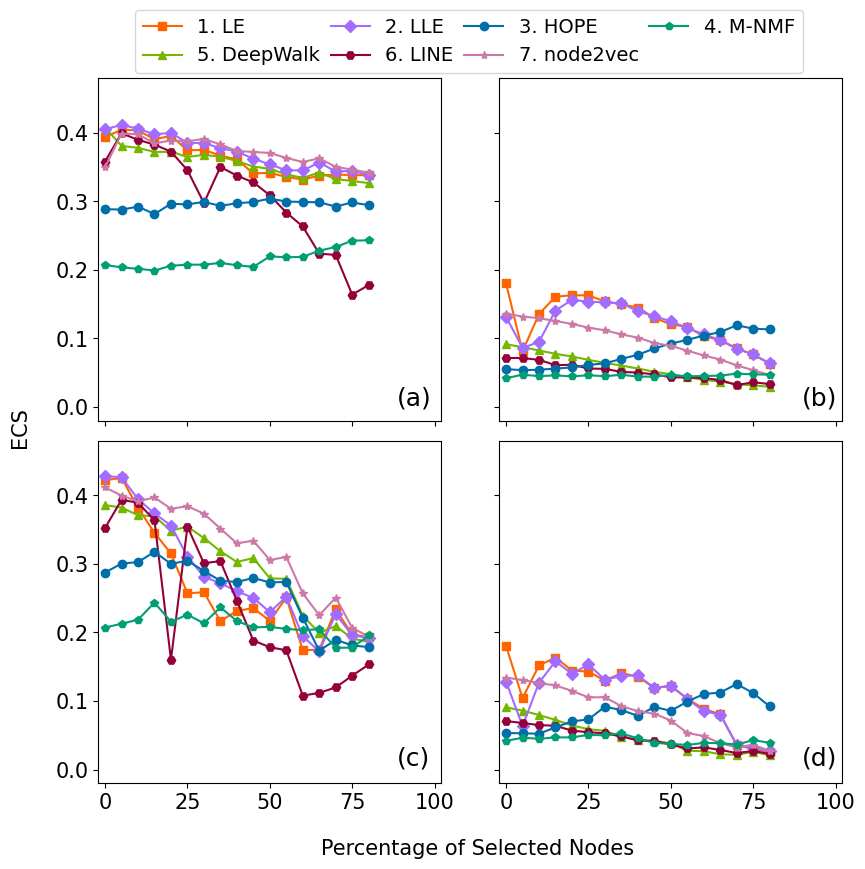

Method_Compare_32_0.01_0810.png


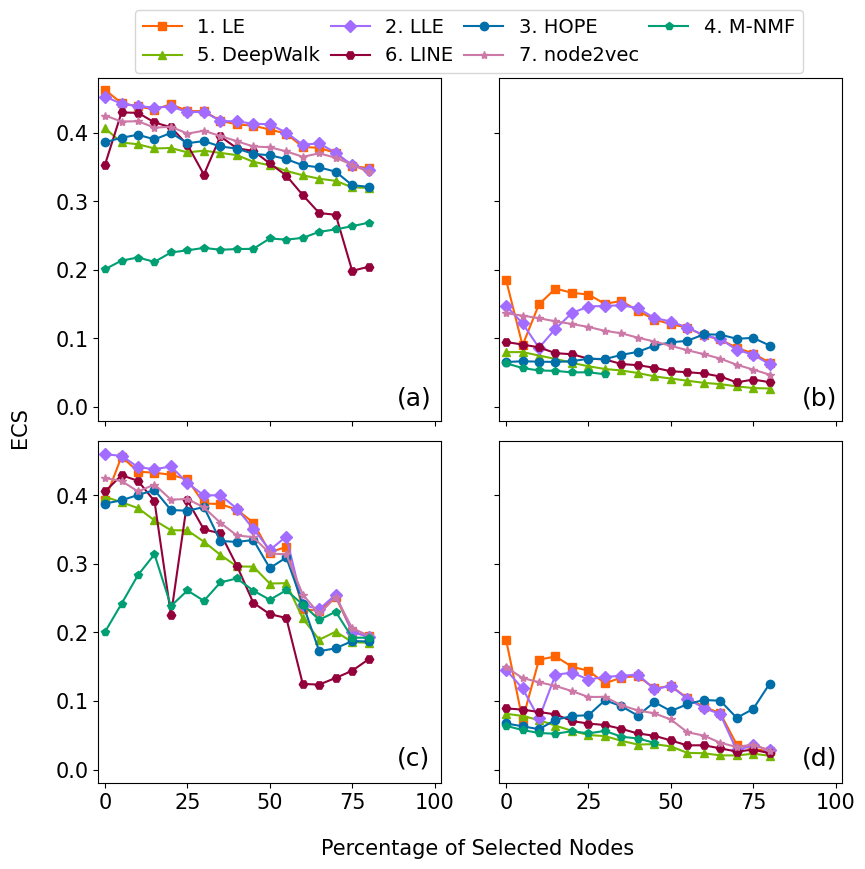

In [3]:
dimensions= [16, 32]
for dimension in dimensions:
    Plot(dimension=dimension, mu=0.01)